In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('Iris-dataset.csv')

In [5]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [29]:
data.unique().value_counts()

AttributeError: 'DataFrame' object has no attribute 'unique'

In [6]:
len(data)

150

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
data["class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

In [9]:
data.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


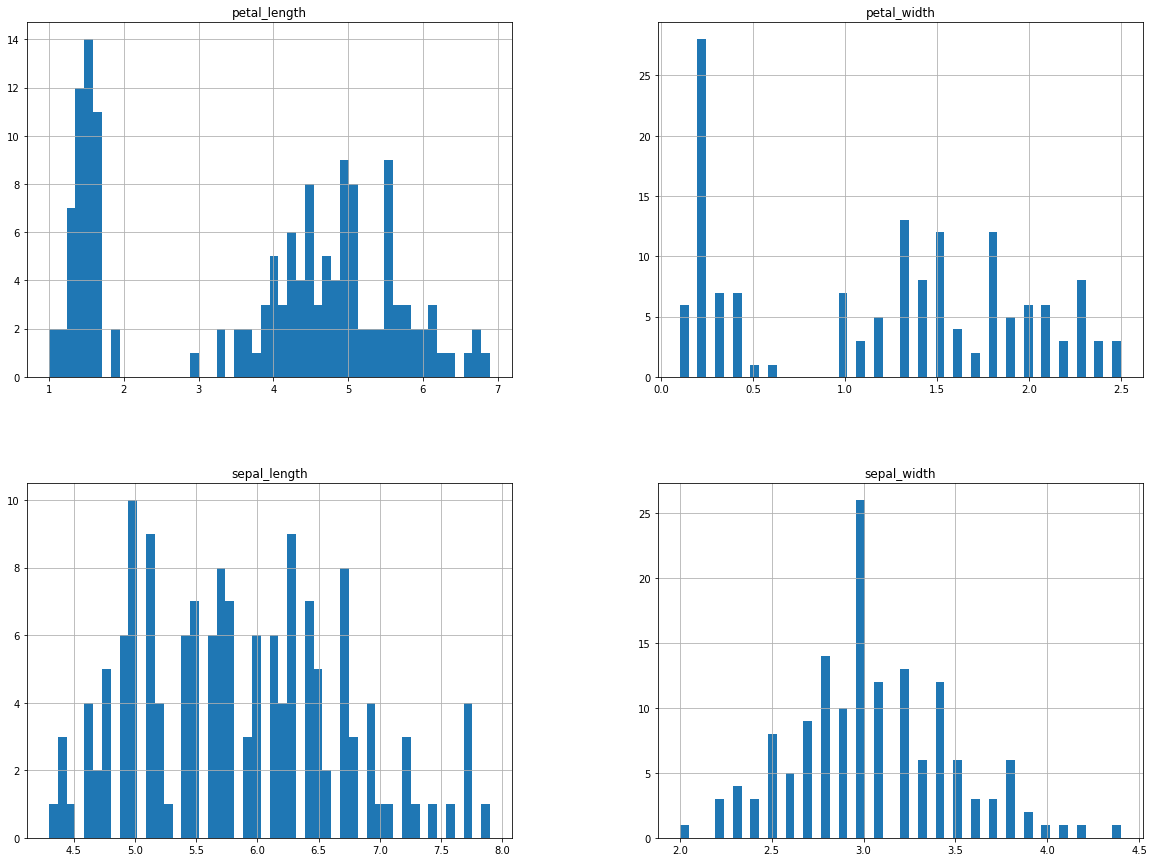

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=50, figsize=(20,15))
plt.show()

In [11]:
'''def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]'''

'def split_train_test(data, test_ratio):\n    shuffled_indices = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled_indices[:test_set_size]\n    train_indices = shuffled_indices[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]'

In [12]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [13]:
len(train_set)

120

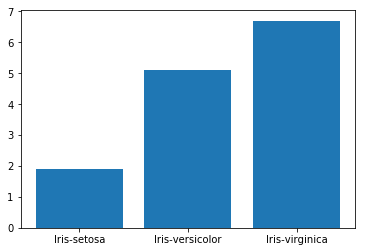

In [14]:
iris_train = train_set
iris_class = iris_train['class'].values
petal_length = iris_train['petal_length'].values
plt.bar(iris_class,petal_length, 0.8)
plt.show()

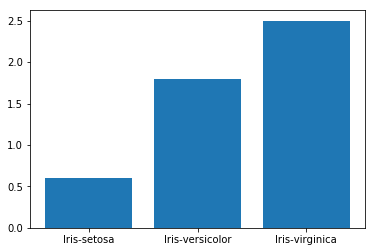

In [15]:
iris_train = train_set
iris_class = iris_train['class'].values
petal_width = iris_train['petal_width'].values
plt.bar(iris_class,petal_width, 0.8)
plt.show()

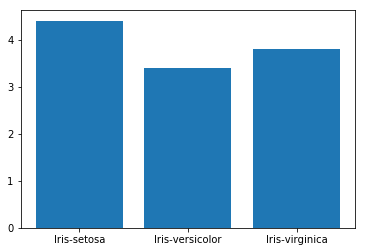

In [16]:
iris_train = train_set
iris_class = iris_train['class'].values
sepal_width = iris_train['sepal_width'].values
plt.bar(iris_class,sepal_width, 0.8)
plt.show()

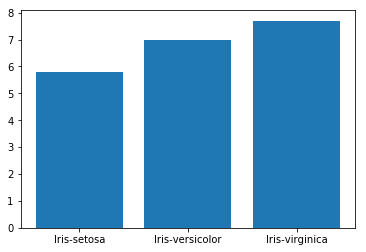

In [17]:
iris_train = train_set
iris_class = iris_train['class'].values
sepal_length = iris_train['sepal_length'].values
plt.bar(iris_class,sepal_length, 0.8)
plt.show()

In [18]:
iris_train.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.097191,0.862183,0.801485
sepal_width,-0.097191,1.000000,-0.422447,-0.357768
petal_length,0.862183,-0.422447,1.000000,0.962432
petal_width,0.801485,-0.357768,0.962432,1.000000


From the correlation matrix we see that there is a strong positive correlation between petal_length and sepal_length, petal_width and sepal_length and petal_width and petal_length.

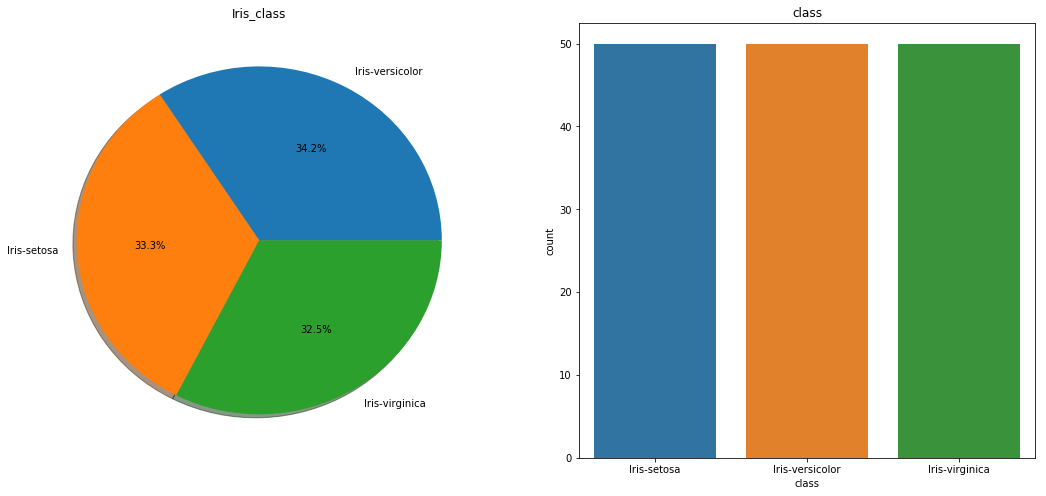

In [19]:
import seaborn as sns
f,ax=plt.subplots(1,2,figsize=(18,8))
iris_train['class'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Iris_class')
ax[0].set_ylabel('')
sns.countplot('class',data=data,ax=ax[1])
ax[1].set_title('class')
plt.show()

In [20]:
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [21]:

train_X=iris_train[iris_train.columns[:4]]
train_Y=iris_train[iris_train.columns[4]]
test_X=test_set[test_set.columns[:4]]
test_Y=test_set[test_set.columns[4]]
X=data[data.columns[:4]]
Y=data['class']

In [23]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the data into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_dataframe2

,CV Mean,Std
Linear Svm,0.960000,0.053333
Radial Svm,0.953333,0.052068
Logistic Regression,0.880000,0.148474
KNN,0.933333,0.084327
Decision Tree,0.926667,0.091652
Naive Bayes,0.946667,0.058119
Random Forest,0.946667,0.071802


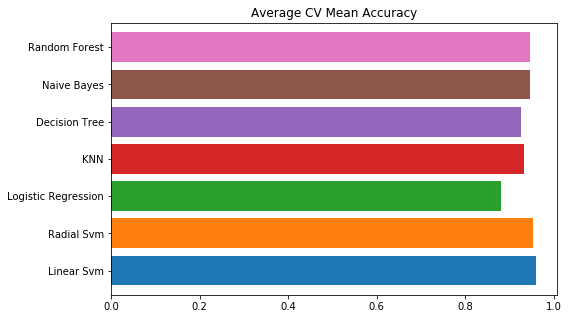

In [24]:
new_models_dataframe2['CV Mean'].plot.barh(width=0.8)
plt.title('Average CV Mean Accuracy')
fig=plt.gcf()
fig.set_size_inches(8,5)
plt.show()

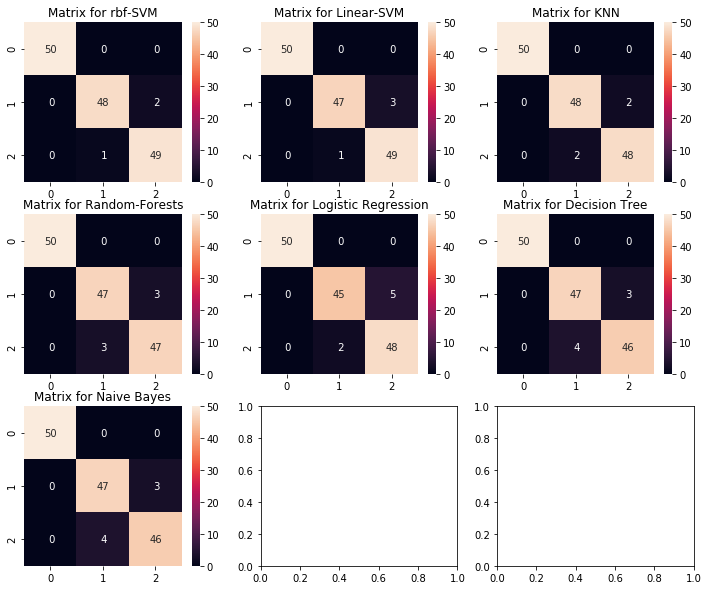

In [25]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()


In [26]:
confusion_matrix(Y,y_pred)

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  4, 46]])

In [31]:
help(svm)

Help on package sklearn.svm in sklearn:

NAME
    sklearn.svm - The :mod:`sklearn.svm` module includes Support Vector Machine algorithms.

PACKAGE CONTENTS
    base
    bounds
    classes
    liblinear
    libsvm
    libsvm_sparse
    setup
    tests (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassifierMixin, sklearn.linear_model.base.SparseCoefMixin)
    sklearn.base.RegressorMixin(builtins.object)
        sklearn.svm.classes.LinearSVR(sklearn.linear_model.base.LinearModel, sklearn.base.RegressorMixin)
        sklearn.svm.classes.NuSVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
        sklearn.svm.classes.SVR(sklearn.svm.base.BaseLibSVM, sklearn.base.RegressorMixin)
    sklearn.linear_model.base.LinearClassifierMixin(sklearn.base.ClassifierMixin)
        sklearn.svm.classes.LinearSVC(sklearn.base.BaseEstimator, sklearn.linear_model.base.LinearClassif

In [32]:
from sklearn.model_selection import GridSearchCV
C=[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1]
gamma=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
kernel=['rbf','linear']
hyper={'kernel':kernel,'C':C,'gamma':gamma}
gd=GridSearchCV(estimator=svm.SVC(),param_grid=hyper,verbose=True)
gd.fit(X,Y)
print(gd.best_score_)
print(gd.best_estimator_)

Fitting 3 folds for each of 240 candidates, totalling 720 fits
0.9866666666666667
SVC(C=0.4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


[Parallel(n_jobs=1)]: Done 720 out of 720 | elapsed:    2.3s finished


In [33]:
clf=svm.SVC(kernel='rbf')

In [36]:
clf.fit(train_X, train_Y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [41]:
predicted = clf.predict(test_X)
predicted

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [40]:
confusion_matrix(test_Y, predicted)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])